# Ejercicio 1

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score



In [7]:
df = pd.read_csv("../data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


a. Utiliza el método info de Pandas sobre el DataFrame para comprobar que
todas las variables del problema son numéricas. ¿Cuántos valores faltantes
tiene cada variable? Explica el nombre y el significado de las variables que
aparecen en el dataset. ¿Tiene sentido que alguien tenga un índice de
masa corporal o una presión sanguínea igual a cero? En las variables que
corresponda, sustituye los valores que no tengan sentido por valores
np.nan. Vuelve a utilizar el método info() de Pandas. ¿Cuántos valores
faltantes aprecias ahora?

Todas las variables son numéricas

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Todas las variables no tienen ningún valor faltante

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- Pregnancies (embarazos): Número de veces que ha estado embarazada.


- Glucose (glucosa): Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia oral a la glucosa.


- BloodPressure (Presión arterial): Presión arterial diastólica (mm Hg).


- SkinThickness (Grosor de la piel): Grosor del pliegue cutáneo del tríceps (mm).


- Insulin (Insulina): Insulina sérica de 2 horas (mu U/ml).


- BMI: Índice de masa corporal kg/m2, es un método de evaluación fácil y económico para la categoría de peso: bajo peso, peso saludable, sobrepeso, y obesidad.


- DiabetesPedigreeFunction (Función de diabetes pedigrí): Función que representa la probabilidad de que contraigan la enfermedad extrapolando la historia de sus antepasados.


- Age: Edad.


- Outcome (Resultado): Variable de clase (0 o 1) 268 de 768 son 1, los demás son 0.

No tiene sentido que alguien tenga un índice de masa corporal igual a 0 ya que se calcula dividiendo el peso (kg) por el cuadrado de la estatura cosa que nunca va a dar como resultado 0, al igual que no tiene sentido que la presión sanguínea sea igual a 0, esta puede descender a niveles bajos provocando una afección conocida como choque pero no puede tomar valor igual a cero salvo que esta persona haya fallecido.

En este caso se necesita sustituir algunas valores por np.nan en: "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" ya que poseen valores que no tiene sentido.

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
varibles = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[df[varibles] == 0] = np.NAN
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


Podemos observa que, debido al cambio de algunos valores en las varibles  "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" ahora el número de valores faltantes ha incrementado, teniendo:
- Glucose. 5 valores faltantes.


- BloodPressure. 35 valores faltantes.


- SkinThickness. 227 valores faltantes.


- Insulin. 374 valores faltantes.


- BMI. 11 valores faltantes.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


b. La mayoría de los métodos de Machine Learning no pueden tomar como datos de entrada datasets en los que haya valores faltantes. Para poder
usar estos datasets se pueden tomar dos enfoques. Uno de ellos es eliminar
todos los registros en los que haya valores faltantes, de forma que nos
quedamos con un nuevo dataset de menor tamaño que el original. Este
enfoque es rápido y sencillo, pero tiene inconvenientes. Si el número de
instancias con valores faltantes es grande, podemos quedarnos con un
dataset demasiado pequeño. Además, es posible que existan razones o
correlaciones por los cuales los datos faltan, por lo que al eliminarlos
estaríamos eliminando del dataset un tipo particular de instancia que no se
tendría en cuenta al entrenar el modelo, socavando su capacidad de
predicción. Podemos comprobar esta circunstancia haciendo algunos
análisis estadísticos de los datos presentes y los datos faltantes.

Usando el DataFrame en el que los valores faltantes han sido marcados
como np.nan, dibuja en una misma gráfica dos histogramas, ambos con
nivel de transparencia (alpha) igual a 0.7, y de forma que ambos sean de
colores distintos. Uno de los histogramas corresponderá al histograma de la
variable “DiabetesPedrigreeFunction” de las instancias en las que “Insulin”
tiene un valor numérico. El otro histograma corresponderá al histograma de
la variable “DiabetesPedrigreeFunction” de las instancias en las que el valor de “Insulin” es un valor faltante. ¿Ambos histogramas son iguales?
¿Podemos pensar que los valores de “Insulin” son faltantes con
independencia de cuál sea el valor de “DiabetesPedrigreeFunction”?

Ambos histogramas se asemejan mucho pero no son iguales.

Sí, se puede pensar que los valores de "Insulin" son faltantes con independencia del valor de “DiabetesPedrigreeFunction” ya que podemos ver que las gráficas no son muy diferentes

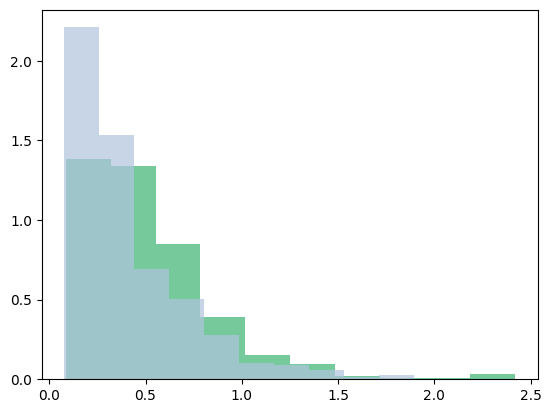

In [13]:
num_val = df.DiabetesPedigreeFunction[~pd.isnull(df["Insulin"])]
nan_val= df.DiabetesPedigreeFunction[pd.isnull(df["Insulin"])]
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(num_val, alpha=0.7, color="mediumseagreen", density=True )
ax.hist(nan_val, alpha=0.7, color="lightsteelblue", density=True)
plt.show()

c. Otro de los enfoques que se pueden utilizar es el de imputar o rellenar los
valores faltantes del dataset. No existe una técnica general que nos
permita encontrar la mejor imputación de valores faltantes, pero existen
algunos enfoques básicos que, por su sencillez, pueden ser las primeras
ideas a aplicar cuando trabajamos con un dataset desconocido.
Permitiremos la presencia de valores faltantes tanto en el conjunto de
entrenamiento como en el de test. Sin embargo, hay un factor
imprescindible a tener en cuenta: debemos imputar los valores faltantes en
el conjunto de test de acuerdo a las reglas y parámetros establecidos en el
conjunto de entrenamiento. De lo contrario, estaríamos falseando la
capacidad predictora de nuestro modelo debido a un fenómeno
conocido como data leakage, en el que la predicción sobre el conjunto de
test se evalúa utilizando una información sobre el conjunto de la que no se
va a disponer cuando se aplique el modelo a instancias que provengan del
mundo real. Para evitar el data leakage utilizaremos la clase Pipeline de
Scikit Learn en la que se definirán dos pasos: primero el método de
imputación y después el modelo de Machine Learning con el que se
resolverá el problema.

En este apartado vamos a imputar todos los valores faltantes del dataset
utilizando un valor constante igual a cero. Declara un objeto de la clase
SimpleImputer de Scikit Learn en el que el argumento “strategy” sea igual a
“constant”. Declara un objeto de la clase RandomForestClassifier de Scikit
Learn con los valores por defecto. Declara un objeto de la clase Pipeline de
Scikit Learn en el que en la variable “steps” se utilice primero el objeto de
SimpleImputer y después el objeto de RandomForestClassifier. Declara un
objeto de la clase StratifiedKFold en el que la variable ‘n_splits’ sea igual a 10 y la variable “random_state” sea igual a 42. Utiliza el método
“cross_val_score” de Scikit Learn para obtener 10 valores de la métrica del
clasificador aplicado a este conjunto de datos. En los argumentos del
método debemos utilizar el objeto de la clase Pipeline que hemos definido
anteriormente, un DataFrame X donde se han tenido en cuenta solo las
variables predictoras y un array de numpy Y en el que aparezcan los valores
de la target. El argumento “scoring” debe ser igual a “accuracy", y el
argumento ‘cv’ debe ser igual al objeto de la clase “StratifiedKFold” que
hemos declarado antes. Guarda los valores de las métricas obtenidas en un
array llamado accuracy_constant.

In [14]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"] 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

In [16]:
simple_const = SimpleImputer(missing_values=np.nan, strategy="constant")

In [17]:
random_const = RandomForestClassifier()

In [18]:
pipeline_const = Pipeline(steps=[('scales', simple_const),('reg',random_const)])

In [19]:
strat_const =StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [20]:
accuracy_const = cross_val_score(pipeline_const, X_train, y_train, scoring = "accuracy", cv =strat_const )

In [21]:
accuracy_const

array([0.72222222, 0.72222222, 0.81481481, 0.74074074, 0.72222222,
       0.72222222, 0.7037037 , 0.77358491, 0.73584906, 0.69811321])

d. En este apartado vamos a imputar todos los valores faltantes del dataset
utilizando el valor de la media de la variable en el conjunto de
entrenamiento. Repite los pasos del apartado anterior pero de forma que el
argumento “strategy” del objeto de la clase SimpleImputer sea igual a
“mean”. Guarda los valores de las métricas obtenidas en un array llamado
accuracy_mean.

In [22]:
simple_mean = SimpleImputer(missing_values=np.nan, strategy="mean")

In [23]:
random_mean = RandomForestClassifier()

In [24]:
pipeline_mean = Pipeline(steps=[('scales', simple_mean),('reg',random_mean)])

In [25]:
strat_mean =StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [26]:
accuracy_mean = cross_val_score(pipeline_mean, X_train, y_train, scoring = "accuracy", cv =strat_mean )

In [27]:
accuracy_mean

array([0.74074074, 0.68518519, 0.81481481, 0.72222222, 0.74074074,
       0.66666667, 0.75925926, 0.73584906, 0.71698113, 0.71698113])

e. En este apartado vamos a imputar todos los valores faltantes del dataset
utilizando el valor más frecuente de la variable en el conjunto de
entrenamiento. Repite los pasos del apartado anterior pero de forma que el
argumento “strategy” del objeto de la clase SimpleImputer sea igual a
“most_frequent”. Guarda los valores de las métricas obtenidas en un array
llamado accuracy_most_frequent.

In [28]:
simple_m_f = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [29]:
random_m_f = RandomForestClassifier()

In [30]:
pipeline_m_f = Pipeline(steps=[('scales', simple_m_f),('reg',random_m_f)])

In [31]:
strat_m_f =StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [32]:
accuracy_most_frequent = cross_val_score(pipeline_m_f, X_train, y_train, scoring = "accuracy", cv =strat_m_f )

In [33]:
accuracy_most_frequent

array([0.72222222, 0.72222222, 0.83333333, 0.68518519, 0.74074074,
       0.72222222, 0.72222222, 0.71698113, 0.73584906, 0.71698113])

f. En este apartado vamos a imputar todos los valores faltantes del dataset
utilizando un modelo que permita asignar a cada valor faltante el valor
numérico que estime más adecuado. Utilizamos un imputador de tipo KNN,
en el que el valor numérico de un valor faltante se decide mirando cuál es
el valor de sus k vecinos más próximos. Un parámetro fundamental del
modelo será el valor de k, que podremos variar para intentar mejorar la
capacidad predictiva del pipeline en su conjunto.

Repite los pasos del apartado anterior pero de forma que en vez de
declarar un objeto de la clase SimpleImputer, declares un objeto de la
clase KNNImputer de Scikit Learn. Donde el valor de la variable
“n_neighbors” sea igual a 5. Declara el objeto de la clase Pipeline de forma
que en la variable “steps” se utilice primero el objeto de KNNImputer y
después el objeto de RandomForestClassifier. Declara el objeto de la clase
StratifiedKFold y utiliza el método “cross_val_score” de la misma forma que
anteriormente. Guarda los valores de las métricas obtenidas en un array
llamado accuracy_knn_k5

In [34]:
imputer = KNNImputer( n_neighbors=5)

In [35]:
random_imp = RandomForestClassifier()

In [36]:
pipeline_imp = Pipeline(steps=[('scales', imputer),('reg',random_imp)])

In [37]:
strat_imp =StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [38]:
accuracy_knn_k5 = cross_val_score(pipeline_imp, X_train, y_train, scoring = "accuracy", cv =strat_imp )

In [39]:
accuracy_knn_k5

array([0.72222222, 0.68518519, 0.81481481, 0.7037037 , 0.77777778,
       0.7037037 , 0.7037037 , 0.75471698, 0.71698113, 0.67924528])

g. Representa en un gráfico de violín los valores de los arrays
accuracy_constant, accuracy_mean, accuracy_most_frequent y
accuracy_knn_k5. ¿Qué método de imputación parece más apropiado
para este conjunto de datos basándonos en los valores de la accuracy
obtenidos para el dataset de test?

#### Hay que revisarlo
El que tenga la media más alta

{'bodies': [<matplotlib.collections.PolyCollection at 0x2710c5fd890>],
 'cmeans': <matplotlib.collections.LineCollection at 0x2710c5fd450>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2710c527b10>,
 'cmins': <matplotlib.collections.LineCollection at 0x2710c4c8e10>,
 'cbars': <matplotlib.collections.LineCollection at 0x2710c619fd0>}

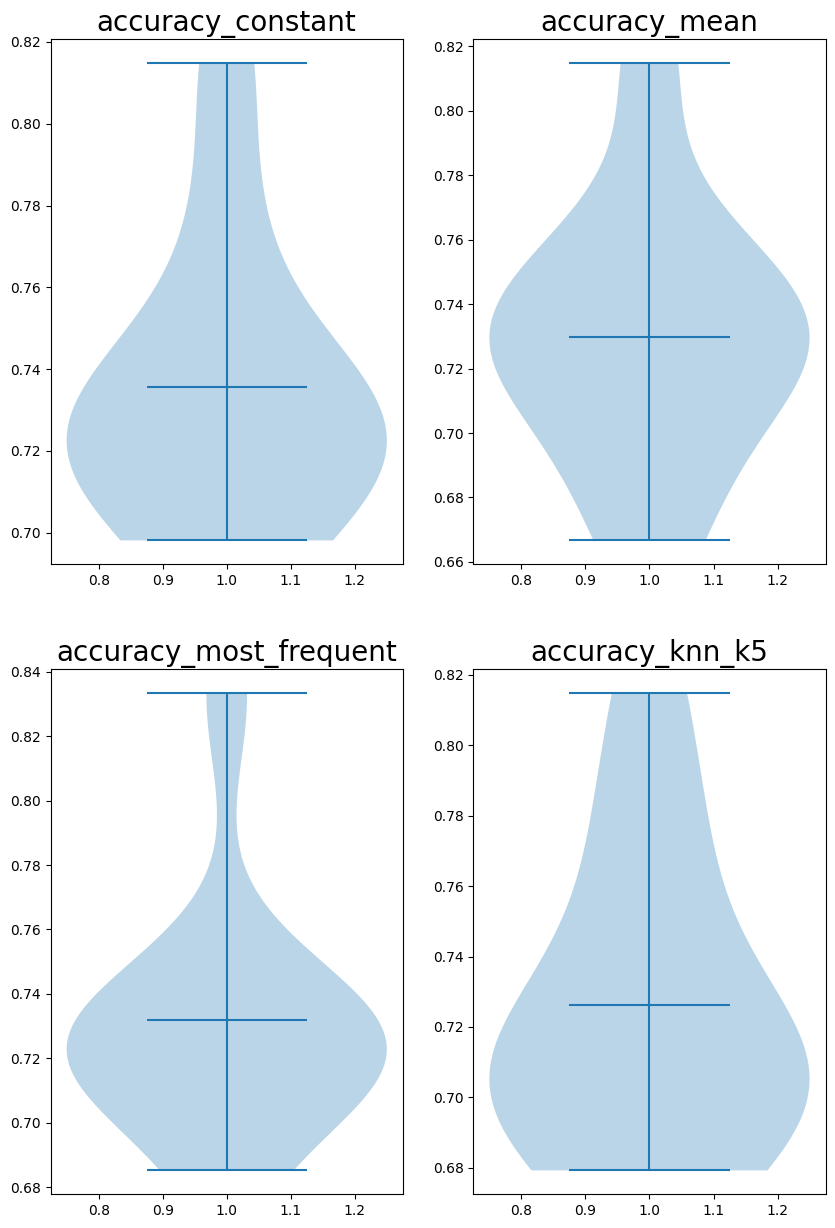

In [40]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,15))

ax1.set_title("accuracy_constant", fontsize = 20)
ax1.violinplot(accuracy_const, showmeans = True)

ax2.set_title("accuracy_mean", fontsize = 20)
ax2.violinplot(accuracy_mean, showmeans = True)

ax3.set_title("accuracy_most_frequent", fontsize = 20)
ax3.violinplot(accuracy_most_frequent, showmeans = True)

ax4.set_title("accuracy_knn_k5", fontsize = 20)
ax4.violinplot(accuracy_knn_k5,  showmeans = True)

h. Busca información sobre el fenómeno de data leakage. Haz un pequeño
resumen de un párrafo de la información que hayas obtenido,
especificando de dónde la has obtenido, y pon un ejemplo de caso de uso
en el que se produzca data leakage por no separar convenientemente los
conjuntos de entrenamiento y test.

Data leakage (fuga de datos) se produce cuando se utiliza información externa al conjunto de datos de entrenamiento para crear el modelo. Esto puede suceder cuando técnicas de preprocesamiento, como normalización, estandarización o selección de características, se aplican al conjunto de datos completo antes de dividirlo en conjuntos de entrenamiento y prueba. El problema surge porque el conjunto de prueba debe simular datos nuevos e inéditos, y si se ve influenciado por el conjunto de datos completo durante el preprocesamiento, ya no sirve como evaluador imparcial del rendimiento del modelo.
Hay dos tipos principales de fugas (leakage): target leakage (fuga de objetivo) y train-test contamination.

#### Target leakage

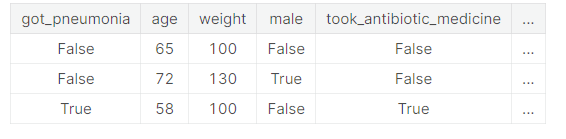

Las personas toman antibióticos después de contraer neumonía para recuperarse. Los datos sin procesar muestran una fuerte relación entre esas columnas, pero take_antibiotic_medicine se cambia con frecuencia después de que se determina el valor de got_pneumonia. Esta es una target leakage .

El modelo vería que cualquiera que tenga un valor Falso para take_antibiotic_medicine no tenía neumonía. Dado que los datos de validación provienen de la misma fuente que los datos de entrenamiento, el patrón se repetirá en la validación y el modelo tendrá excelentes puntuaciones de validación (o validación cruzada).

Pero el modelo será muy inexacto cuando se implemente posteriormente en el mundo real, porque incluso los pacientes que contraerán neumonía aún no habrán recibido antibióticos cuando necesitemos hacer predicciones sobre su salud futura.

Para evitar este tipo de fuga de datos, se debe excluir cualquier variable actualizada (o creada) después de alcanzar el valor objetivo.


#### Bibliografía 
- https://www.kaggle.com/code/alexisbcook/data-leakage/tutorial
- https://medium.com/@gdellamattia/data-leakage-impacto-en-los-gadgets-c2fd136c273c
- https://towardsdatascience.com/data-leakage-in-machine-learning-how-it-can-be-detected-and-minimize-the-risk-8ef4e3a97562

# Ejercicio 2

In [41]:
df_house = pd.read_csv("housing.csv", skipinitialspace = True)
df_house

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

In [ ]:
df_house.drop("ocean_proximity", inplace = True, axis= 1)
df_house.dropna(inplace=True)

In [ ]:
y_house = df_house["median_house_value"]
df_house.drop("median_house_value", axis=1, inplace=True)
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_house, y_house, test_size=0.3, random_state=12 )

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(14303, 8) (6130, 8) (14303,) (6130,)


a. Crea un ColumnTransformer que aplique StandardScaler a las variables
“longitude” y “latitude” y aplique PowerTransformer (con
method=’box-cox’) y StandardScaler al resto de variables. Crea un Pipeline
que tenga como primer paso el ColumnTransformer así definido, como
segundo paso un objeto SelectKBest y como tercer paso un objeto Linear
Regression. Crea un objeto TransformedTargetRegressor que utilice como
‘regressor’ el Pipeline antes definido y como ‘transformer’ una
transformación PowerTransformer (con method=’box-cox’). Este último paso
aplicará de forma adecuada una transformacion de Box-Cox sobre la
variable objetivo